In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# cd drive/MyDrive/Ibtehaj/NFT_Creation

/content/drive/.shortcut-targets-by-id/1j-C-_Y9506zbNLYqQ2X1ELqiRHDsx3T8/Ibtehaj/NFT_Creation


In [4]:
# cd abstract-art-neural-network

/content/drive/.shortcut-targets-by-id/1j-C-_Y9506zbNLYqQ2X1ELqiRHDsx3T8/Ibtehaj/NFT_Creation/abstract-art-neural-network


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import colors
import os, copy
from PIL import Image
import cv2

from numba import jit, cuda

In [3]:
def init_normal(m):
    if type(m) == nn.Linear:        
        nn.init.normal_(m.weight)

class NN(nn.Module):

    def __init__(self, activation=nn.Tanh, num_neurons=16, num_layers=9):
        """
        num_layers must be at least two
        """
        super(NN, self).__init__()
        layers = [nn.Linear(2, num_neurons, bias=True), activation()]
        for _ in range(num_layers - 1):
            layers += [nn.Linear(num_neurons, num_neurons, bias=False), activation()]
        layers += [nn.Linear(num_neurons, 3, bias=False), nn.Sigmoid()]
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)


def gen_new_image(size_x, size_y, count, save=True, **kwargs):
#     print(**kwargs)
    net = NN(**kwargs)
    net.apply(init_normal)
    colors = run_net(net, size_x, size_y)
#     plot_colors(colors)
    if save is True:
        save_colors(colors,count)
    return net, colors

@jit 
def run_net(net, size_x=2048, size_y=2048):
    x = np.arange(0, size_x, 1)
    y = np.arange(0, size_y, 1)
    colors = np.zeros((size_x, size_y, 2))
    
    for i in x:
        for j in y:
            colors[i][j] = np.array([float(i) / size_y - 0.5, float(j) / size_x - 0.5])
    colors = colors.reshape(size_x * size_y, 2)
    img = net(torch.tensor(colors).type(torch.FloatTensor)).detach().numpy()
    #img="/content/drive/MyDrive/Ibtehaj/NFT_Creation/abstract-art-neural-network/8767.png"
    # img=cv2.imread(img)
    # print("ibtehaj",img)
    # print("ibtehaj",img.shape)
    # print("ibtehaj",type(img))
    return img.reshape(size_x, size_y,3)
@jit
def plot_colors(colors, fig_size=4):
    plt.figure(figsize=(fig_size, fig_size))
    plt.imshow(colors, interpolation='nearest', vmin=0, vmax=1)
@jit
def save_colors(colors,count):
    plt.imsave("hh_ibtehaj_1/"+ str(count) + ".png", colors)
def run_plot_save(net, size_x, size_y, fig_size=8):
    colors = run_net(net, size_x, size_y)
    plot_colors(colors, fig_size)
    save_colors(colors)

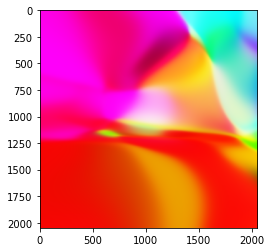

In [8]:
n,c = gen_new_image(2048, 2048,5,save=True, num_layers=5)

In [ ]:
run_plot_save(n, 1080, 720)

In [7]:
import random
for num_layers in range(589,2000, 1):
    print(f"{num_layers} layers")
    n,c = gen_new_image(2048, 2048,num_layers, save=True, num_layers=random.randint(6,20))

589 layers
590 layers
591 layers
592 layers
593 layers
594 layers
595 layers
596 layers
597 layers
598 layers
599 layers
600 layers
601 layers
602 layers
603 layers
604 layers
605 layers
606 layers
607 layers
608 layers
609 layers
610 layers
611 layers
612 layers
613 layers
614 layers
615 layers
616 layers
617 layers
618 layers
619 layers
620 layers
621 layers
622 layers
623 layers
624 layers
625 layers
626 layers
627 layers
628 layers
629 layers
630 layers
631 layers
632 layers
633 layers
634 layers
635 layers
636 layers
637 layers
638 layers
639 layers
640 layers
641 layers
642 layers
643 layers
644 layers
645 layers
646 layers
647 layers
648 layers
649 layers
650 layers
651 layers
652 layers
653 layers
654 layers
655 layers
656 layers
657 layers
658 layers
659 layers
660 layers
661 layers
662 layers
663 layers
664 layers
665 layers
666 layers
667 layers
668 layers
669 layers
670 layers
671 layers
672 layers
673 layers
674 layers
675 layers
676 layers
677 layers
678 layers
679 layers

1306 layers
1307 layers
1308 layers
1309 layers
1310 layers
1311 layers
1312 layers
1313 layers
1314 layers
1315 layers
1316 layers
1317 layers
1318 layers
1319 layers
1320 layers
1321 layers
1322 layers
1323 layers
1324 layers
1325 layers
1326 layers
1327 layers
1328 layers
1329 layers
1330 layers
1331 layers
1332 layers
1333 layers
1334 layers
1335 layers
1336 layers
1337 layers
1338 layers
1339 layers
1340 layers
1341 layers
1342 layers
1343 layers
1344 layers
1345 layers
1346 layers
1347 layers
1348 layers
1349 layers
1350 layers
1351 layers
1352 layers
1353 layers
1354 layers
1355 layers
1356 layers
1357 layers
1358 layers
1359 layers
1360 layers
1361 layers
1362 layers
1363 layers
1364 layers
1365 layers
1366 layers
1367 layers
1368 layers
1369 layers
1370 layers
1371 layers
1372 layers
1373 layers
1374 layers
1375 layers
1376 layers
1377 layers
1378 layers
1379 layers
1380 layers
1381 layers
1382 layers
1383 layers
1384 layers
1385 layers
1386 layers
1387 layers
1388 layers
1389

RuntimeError: [enforce fail at CPUAllocator.cpp:64] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 268435456 bytes. Error code 12 (Cannot allocate memory)


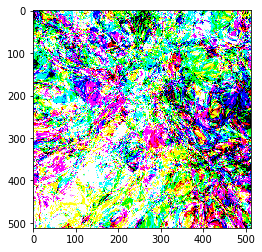

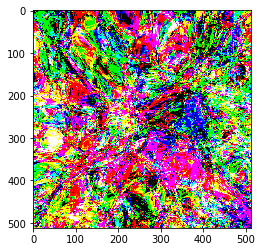

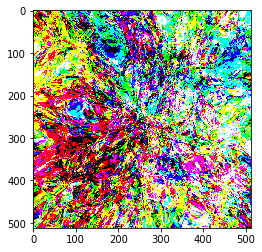

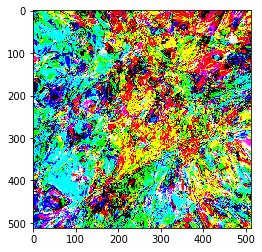

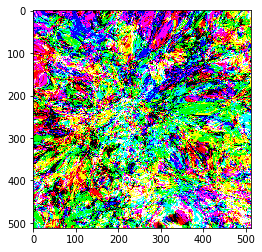

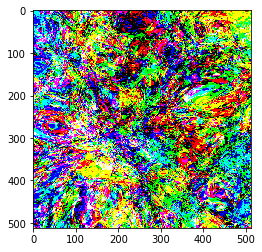

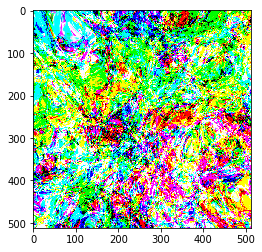

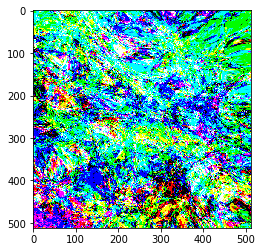

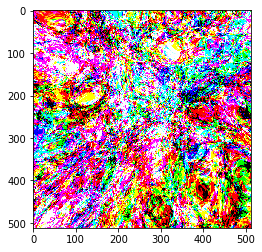

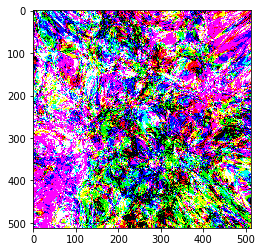

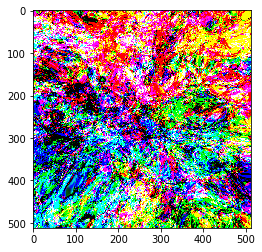

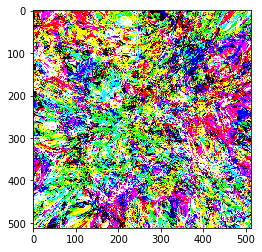

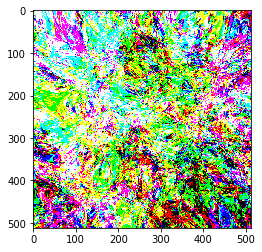

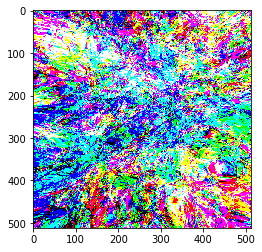

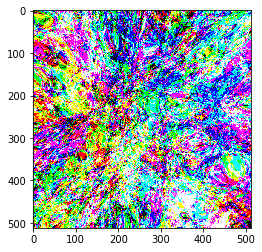

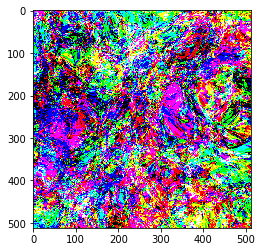

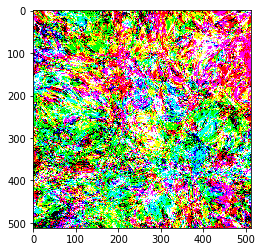

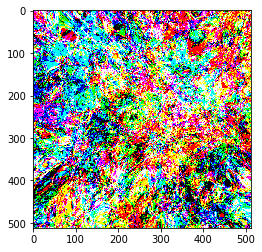

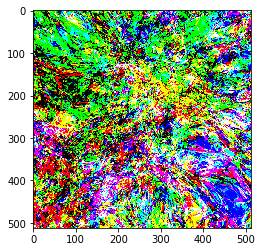

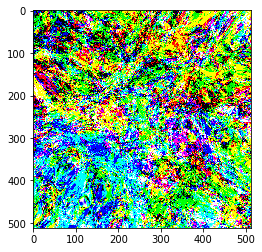

In [6]:
for i in range(100, 120,1):
    n,c = gen_new_image(512, 512, save=True, num_neurons=i)

Let's see how the images change if we increase the depth

In [ ]:
for num_layers in range(2, 100, 3):
    print(f"{num_layers} layers")
    n,c = gen_new_image(128, 128, save=True, num_layers=num_layers)

And also the effect of increasing the width

In [ ]:
for i in range(1, 50, 4):
    print(f"{i} layers")
    n,c = gen_new_image(128, 128, save=True, num_neurons=2**i)

What happens if we use ReLUs?

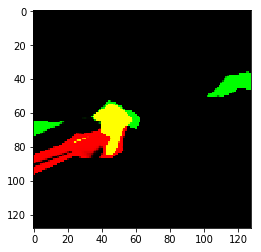

In [ ]:
# n,c = gen_new_image(128, save=False, activation=nn.ReLU)

1 layers
5 layers
9 layers
13 layers
17 layers
21 layers
25 layers
29 layers
33 layers
37 layers
41 layers
45 layers
49 layers


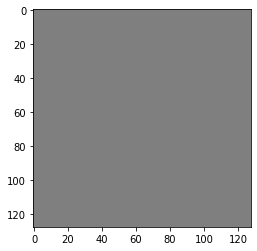

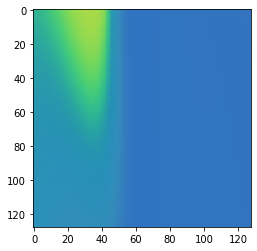

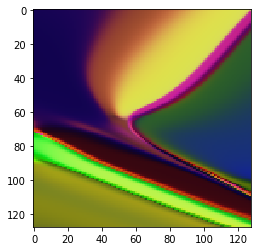

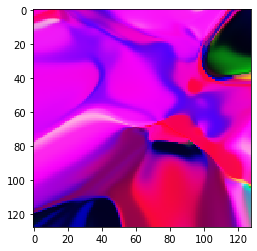

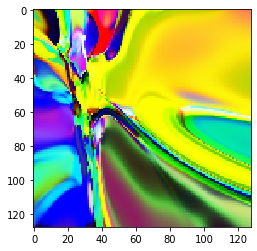

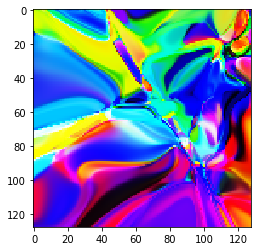

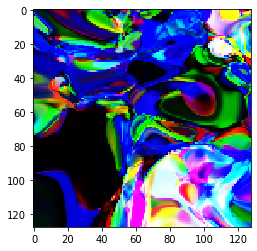

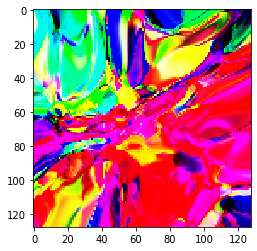

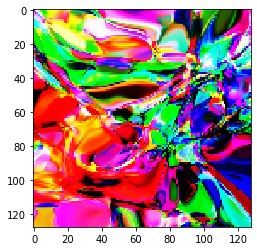

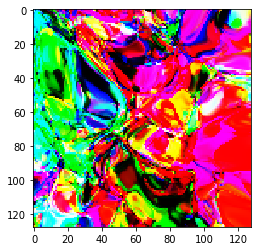

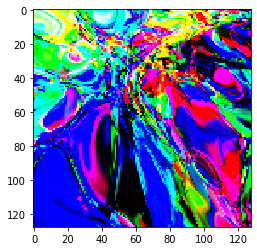

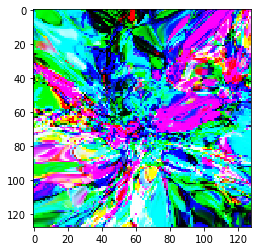

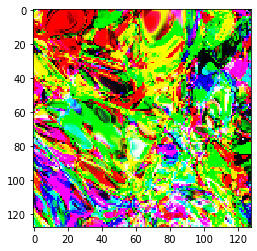

In [42]:
for i in range(1, 50, 4):
    print(f"{i} layers")
    n,c = gen_new_image(128, 128, save=True, num_neurons=i)

1 layers
6 layers
11 layers
16 layers
21 layers
26 layers
31 layers
36 layers
41 layers
46 layers
51 layers
56 layers
61 layers
66 layers


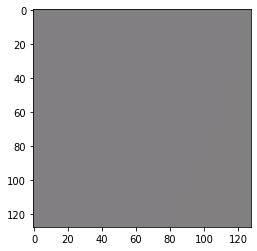

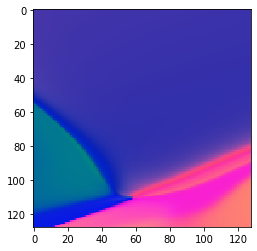

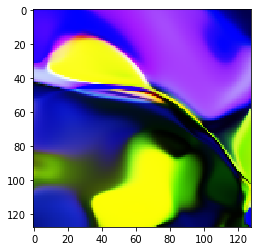

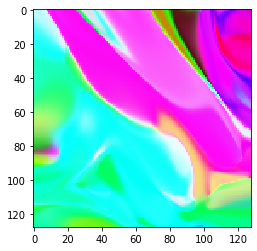

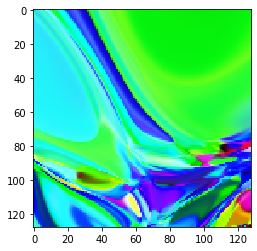

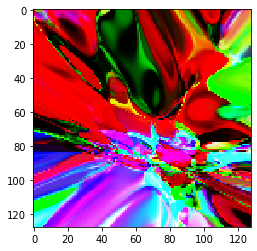

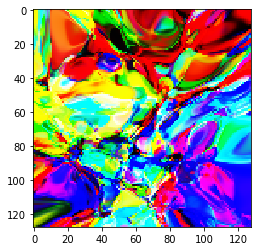

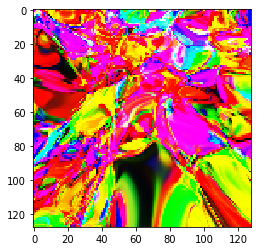

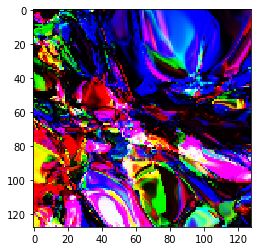

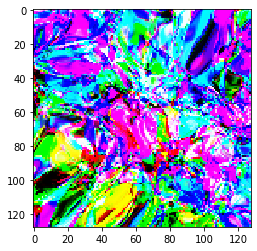

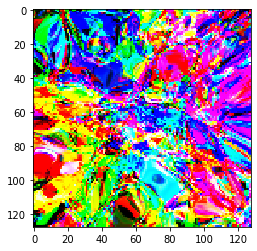

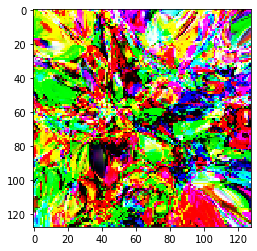

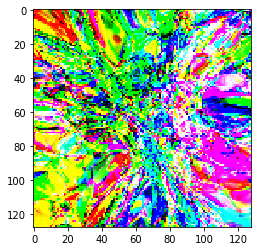

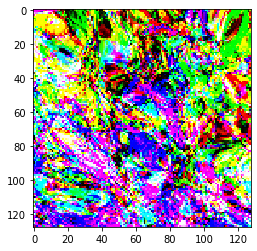

In [43]:
for i in range(1, 70, 5):
    print(f"{i} layers")
    n,c = gen_new_image(128, 128, save=True, num_neurons=i)

5 layers
70 layers
135 layers
200 layers
265 layers
330 layers
395 layers
460 layers
525 layers
590 layers
655 layers
720 layers
785 layers
850 layers
915 layers
980 layers


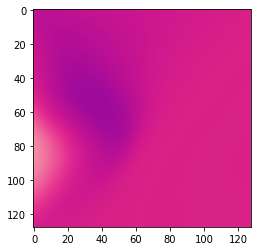

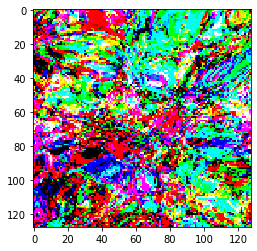

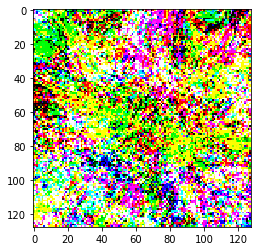

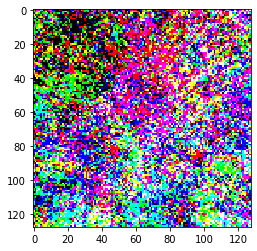

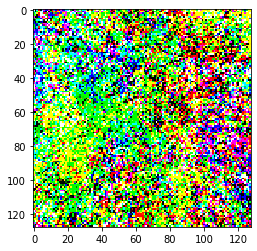

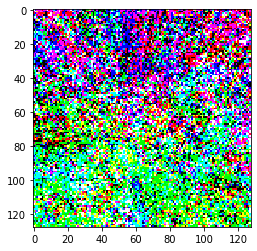

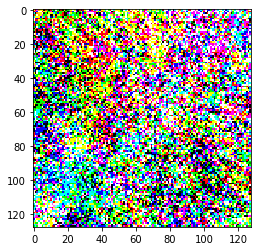

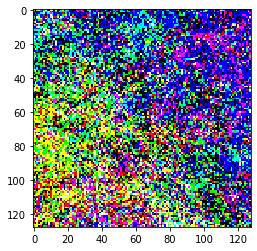

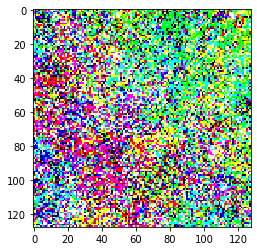

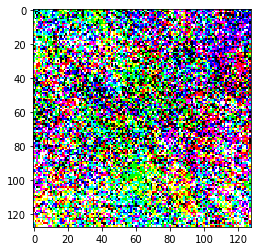

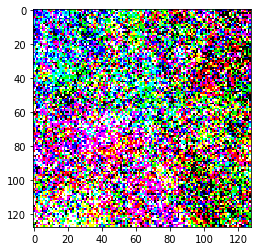

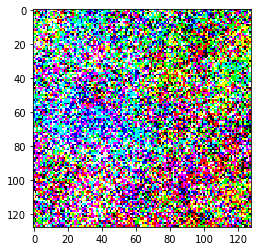

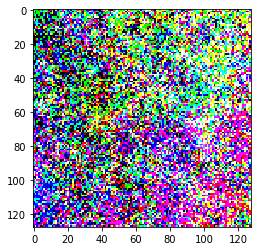

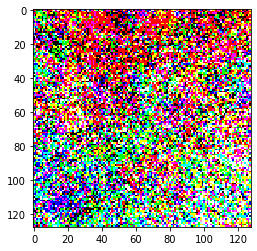

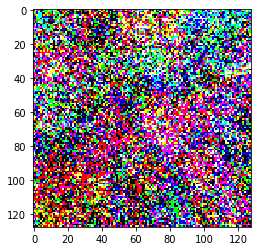

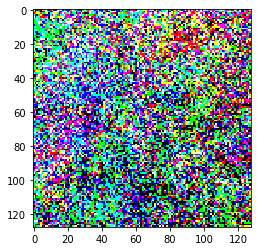

In [44]:
for i in range(5, 1000, 65):
    print(f"{i} layers")
    n,c = gen_new_image(128, 128, save=True, num_neurons=i)